In [1]:
import torch

c:\Users\marek\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:20: UserWarning: Failed to initialize NumPy: No module named 'numpy' (Triggered internally at ..\torch\csrc\utils\tensor_numpy.cpp:84.)
  device: torch.device = torch.device(torch._C._get_default_device()),  # torch.device('cpu'),


### Basics

In [2]:
x = torch.arange(12, dtype=torch.float32)
x

tensor([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11.])

In [3]:
x.numel()

12

In [4]:
x.shape

torch.Size([12])

![alt text](image.png)

In [5]:
X = x.reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [6]:
# elements of vector are laid out one row at a time and thus x[3] == X[0, 3]
x[3] == X[0, 3]

tensor(True)

In [7]:
X.size()

torch.Size([3, 4])

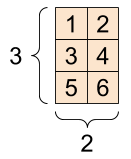

In [8]:
# to automatically infer one component of the shape, we can place a -1 for the shape component that should be inferred automatically
x.reshape(-1, 4)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [9]:
torch.zeros(2, 3, 4)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

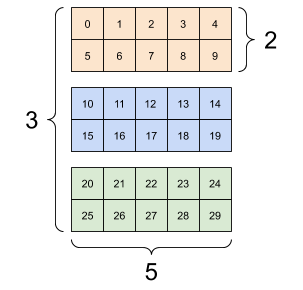 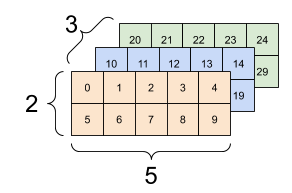

In [10]:
torch.ones(2, 3, 4)

tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])

In [11]:
# a tensor with elements drawn from a standard Gaussian (normal) distribution with mean 0 and standard deviation 1
torch.randn(3, 4)

tensor([[-0.7860,  1.1271, -1.0905, -1.3480],
        [-1.0448,  0.8714, -0.4568,  0.5658],
        [ 0.3302,  0.6276, -0.4073,  0.1013]])

In [12]:
# tensor from Python lists
torch.tensor([[2, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])

tensor([[2, 1, 4, 3],
        [1, 2, 3, 4],
        [4, 3, 2, 1]])

### Indexing and Slicing

In [13]:
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [14]:
X[-1] # negative (reverse) indexing

tensor([ 8.,  9., 10., 11.])

In [15]:
X[1:3] # slicing - includes the first index (start) but not the last (stop)

tensor([[ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [16]:
X[1, 2] = 17 # write elements of a matrix by specifying indices
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5., 17.,  7.],
        [ 8.,  9., 10., 11.]])

In [17]:
X[:2, :] = 12 # : takes all element along selected axis, :<number> takes first <number> elements
X

tensor([[12., 12., 12., 12.],
        [12., 12., 12., 12.],
        [ 8.,  9., 10., 11.]])

### Operations

In [18]:
x

tensor([12., 12., 12., 12., 12., 12., 12., 12.,  8.,  9., 10., 11.])

In [19]:
torch.exp(x)

tensor([162754.7969, 162754.7969, 162754.7969, 162754.7969, 162754.7969,
        162754.7969, 162754.7969, 162754.7969,   2980.9580,   8103.0840,
         22026.4648,  59874.1406])

In [20]:
x = torch.tensor([1.0, 2, 4, 8])
y = torch.tensor([2, 2, 2, 2])

In [21]:
x + y

tensor([ 3.,  4.,  6., 10.])

In [22]:
x - y

tensor([-1.,  0.,  2.,  6.])

In [23]:
x * y

tensor([ 2.,  4.,  8., 16.])

In [24]:
x / y

tensor([0.5000, 1.0000, 2.0000, 4.0000])

In [25]:
x ** y

tensor([ 1.,  4., 16., 64.])

In [26]:
X = torch.arange(12, dtype=torch.float32). reshape(3, 4)
X

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [27]:
Y = torch.tensor([[2.0, 1, 4, 3], [1, 2, 3, 4], [4, 3, 2, 1]])
Y

tensor([[2., 1., 4., 3.],
        [1., 2., 3., 4.],
        [4., 3., 2., 1.]])

In [28]:
torch.cat((X, Y), dim=0)

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.],
        [ 2.,  1.,  4.,  3.],
        [ 1.,  2.,  3.,  4.],
        [ 4.,  3.,  2.,  1.]])

In [29]:
torch.cat((X, Y), dim=1)

tensor([[ 0.,  1.,  2.,  3.,  2.,  1.,  4.,  3.],
        [ 4.,  5.,  6.,  7.,  1.,  2.,  3.,  4.],
        [ 8.,  9., 10., 11.,  4.,  3.,  2.,  1.]])

In [30]:
X == Y

tensor([[False,  True, False,  True],
        [False, False, False, False],
        [False, False, False, False]])

In [31]:
X.sum()

tensor(66.)

### Broadcasting

In [32]:
a = torch.arange(3).reshape((3, 1))
b = torch.arange(2).reshape((1,2))
a, b

(tensor([[0],
         [1],
         [2]]),
 tensor([[0, 1]]))

In [33]:
broadcast_sum = a + b
broadcast_sum

tensor([[0, 1],
        [1, 2],
        [2, 3]])

Boread casting is at frist "streaching" the tensors adding columns/rown with the same value to achive same sizes, and then perform an operation, so:
```
tensor([[0],
         [1],
         [2]])
```
becomes
```
tensor([[0, 0],
        [1, 1],
        [2, 2]])
```

and
```
tensor([[0, 1]])
```
becomes
```
tensor([[0, 1],
        [0, 1],
        [0, 1]])
```

In [34]:
manual_sum = torch.tensor(
        [[0, 0],
        [1, 1],
        [2, 2]]) + torch.tensor(
        [[0, 1],
        [0, 1],
        [0, 1]])
manual_sum

tensor([[0, 1],
        [1, 2],
        [2, 3]])

In [35]:
broadcast_sum == manual_sum

tensor([[True, True],
        [True, True],
        [True, True]])

### Saving Memory

Note that after we run Y = Y + X, id(Y) points to a different location. That is because Python first evaluates Y + X, allocating new memory for the result and then points Y to this new location in memory.

In [36]:
before_id = id(Y)
before_id

2143530371424

In [37]:
Y = Y + X
print(Y)
id(Y) == before_id

tensor([[ 2.,  2.,  6.,  6.],
        [ 5.,  7.,  9., 11.],
        [12., 12., 12., 12.]])


False

That cost us memory and can lead to memory leaks problems, using stale parameters, etc. We can easily over come this with using slicing:

In [38]:
Z = torch.zeros_like(Y)
print("Before ID: ", id(Z))
Z[:] = X + Y
print("After  ID: ", id(Z))

Before ID:  2143530247472
After  ID:  2143530247472


or if the value of Y (for example) is not reused, we can also use X[:] = X + Y or X += Y to reduce the memory overhead of the operation:

In [39]:
before_id = id(Y)
Y += X
id(Y) == before_id

True

### Conversion to Other Python Objects

Converting to a NumPy tensor (ndarray), or vice versa, is easy.
The torch tensor and NumPy array will share their underlying memory, 
and changing one through an in-place operation will also change the other.

### Exercises

In [76]:
A = torch.arange(18).reshape(3, 2, 3)
A

tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])

In [77]:
B = torch.arange(9).reshape(3, 1, 3)
B

tensor([[[0, 1, 2]],

        [[3, 4, 5]],

        [[6, 7, 8]]])

In [78]:
A + B

tensor([[[ 0,  2,  4],
         [ 3,  5,  7]],

        [[ 9, 11, 13],
         [12, 14, 16]],

        [[18, 20, 22],
         [21, 23, 25]]])

When broadcasting three dimensional tensor, you need to 

In [95]:
C = A + B
C

tensor([[[ 0,  2,  4],
         [ 3,  5,  7]],

        [[ 9, 11, 13],
         [12, 14, 16]],

        [[18, 20, 22],
         [21, 23, 25]]])

In [100]:
C == B

tensor([[[ True, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False]]])

In [101]:
C > B

tensor([[[False,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True]],

        [[ True,  True,  True],
         [ True,  True,  True]]])

In [102]:
C < B

tensor([[[False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False]],

        [[False, False, False],
         [False, False, False]]])